# Figures for public outreach talk on paleoclimatology Part 3: Glacial Ocean
_07/2022_



In [31]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.style.use('default')

mpl.rc('font', family='serif') 
mpl.rc('font', serif='Playfair') 
mpl.rc('text', usetex='true') 
mpl.rc('axes',linewidth=0.8)

mpl.rcParams.update({'font.size': 12})

In [2]:
%matplotlib inline

In [1]:
# ## Last 800ka
# co2 = pd.read_csv('data/antarctica2015co2composite.txt',header=137,sep='\t')
# ant_temp = pd.read_csv('data/EDC_dD_temp_estim.tab',header=18,sep='\t')
# natl_ird = pd.read_csv('data/162_983_Barker_Foram_IRD.csv')
# so_ird = pd.read_csv('https://doi.pangaea.de/10.1594/PANGAEA.921111?format=textfile',header=33)
# spratt = pd.read_csv('data/Spratt_sealevel.csv')
# iron = pd.read_csv('data/EDC_DustFlux_25yr (1).tab',sep='\t',header=15)


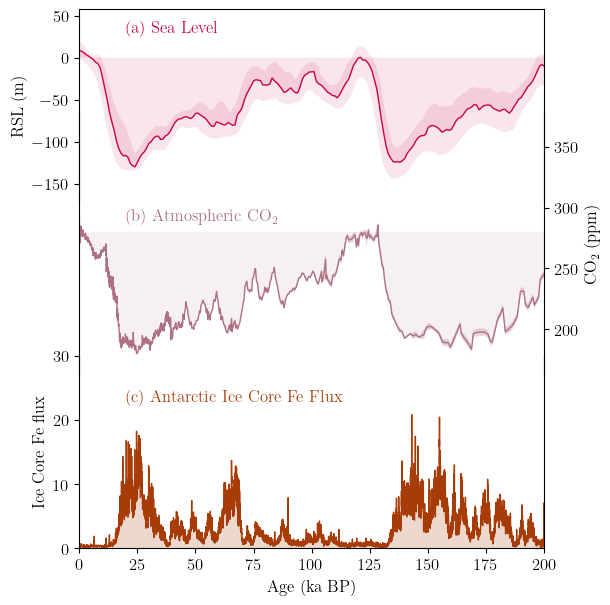

In [40]:
f,ax=plt.subplots(3,1,sharex=True,figsize=(6,7))
plt.subplots_adjust(hspace=-0.1)
for a in ax:
    a.patch.set_visible(False)

    if a!=ax[-1]:
        a.spines['bottom'].set_visible(False)
        a.xaxis.set_ticks_position('none')
    for a in ax[1:]:
        a.spines['top'].set_visible(False)
    for a in ax[1::2]:
        a.yaxis.set_ticks_position('right')
        a.yaxis.set_label_position('right')

ax[0].fill_between(spratt['age_calkaBP'],spratt['SeaLev_longPC1_err_lo'],spratt['SeaLev_longPC1_err_up'],fc='xkcd:ruby',alpha=0.1)
ax[0].fill_between(spratt['age_calkaBP'],0,spratt['SeaLev_longPC1'],fc='xkcd:ruby',alpha=0.1)
ax[0].plot(spratt['age_calkaBP'],spratt['SeaLev_longPC1'],color='xkcd:ruby',lw=1)

ax[1].fill_between(co2['age_gas_calBP']/1000,co2['co2_ppm']-co2['co2_1s_ppm'],co2['co2_ppm']+co2['co2_1s_ppm'],fc='xkcd:mauve',alpha=0.3)
ax[1].fill_between(co2['age_gas_calBP']/1000,280,co2['co2_ppm'],fc='xkcd:mauve',alpha=0.1)

ax[1].plot(co2['age_gas_calBP']/1000,co2['co2_ppm'],color='xkcd:mauve',lw=1)


ax[2].fill_between(iron['Age [ka BP]'],0,iron['Dust flux [mg/m**2/a]'],fc='xkcd:rust',alpha=0.2)
ax[2].plot(iron['Age [ka BP]'],iron['Dust flux [mg/m**2/a]'],color='xkcd:rust',lw=1)
       
    
plt.xlim(0,800)



ax[0].set_ylabel('RSL (m)')
ax[1].set_ylabel('CO$_2$ (ppm)')
ax[2].set_ylabel('Ice Core Fe flux')
ax[-1].set_xlabel('Age (ka BP)')

ax[1].set_xlim(0,200)

box = ax[1].get_position()
box.y1=box.y1+0.1
ax[1].set_position(box)

ax[0].text(20,30,'(a) Sea Level',fontweight='bold',color='xkcd:ruby',ha='left')
ax[1].text(20,290,'(b) Atmospheric CO$_2$',fontweight='bold',color='xkcd:mauve',ha='left')
ax[2].text(20,23,'(c) Antarctic Ice Core Fe Flux',fontweight='bold',color='xkcd:rust',ha='left')

ax[2].set_ylim(0,30)
plt.savefig('figures/0_800_dust.png',transparent=True,dpi=500,bbox_inches='tight')


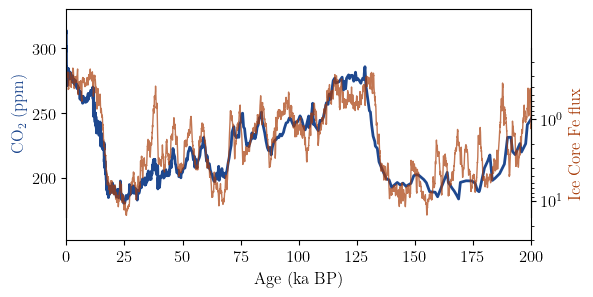

In [56]:
f,ax=plt.subplots(2,1,sharex=True,figsize=(6,3))
plt.subplots_adjust(hspace=-0.8)
for a in ax:
    a.patch.set_visible(False)

    if a!=ax[-1]:
        a.spines['bottom'].set_visible(False)
        a.xaxis.set_ticks_position('none')
    for a in ax[1:]:
        a.spines['top'].set_visible(False)
    for a in ax[1::2]:
        a.yaxis.set_ticks_position('right')
        a.yaxis.set_label_position('right')

ax[0].plot(co2['age_gas_calBP']/1000,co2['co2_ppm'],color='xkcd:cobalt',lw=2)
ax[1].plot(iron['Age [ka BP]'],iron['Dust flux [mg/m**2/a]'].rolling(10).mean(),color='xkcd:rust',lw=1,alpha=0.7)
ax[1].invert_yaxis()
    
plt.xlim(0,100)



ax[0].set_ylabel('CO$_2$ (ppm)',color='xkcd:cobalt')
ax[1].set_ylabel('Ice Core Fe flux',color='xkcd:rust')
ax[-1].set_xlabel('Age (ka BP)')

ax[1].set_xlim(0,200)

box = ax[0].get_position()
box.y0=box.y0-0.05
ax[0].set_position(box)

ax[0].set_ylim(170,330)

ax[1].set_yscale('log')
plt.savefig('figures/co2_iron.png',transparent=True,dpi=500,bbox_inches='tight')
